In [ ]:
import matplotlib.pyplot as plt
import time

# Fibonacci

(a) With Recursive

In [ ]:
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)


(b) Without Recursion

In [ ]:
def fib(n):
    if n <= 1:
        return n
    a,b=0,1
    for i in range(n):
      a,b=b,a+b
    return b


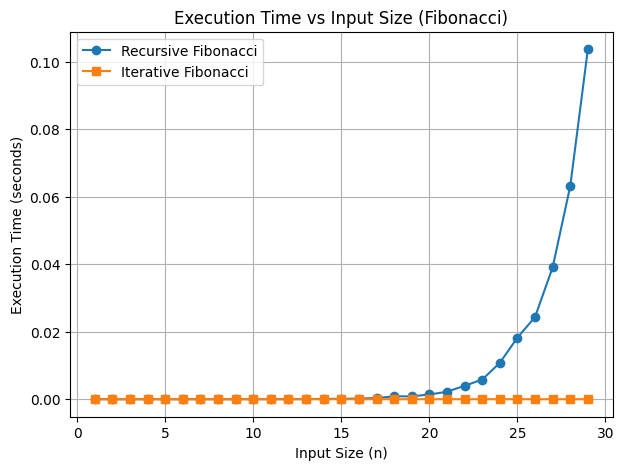

In [ ]:
ns = list(range(1,30))

recursive_times = []
iterative_times = []


for n in ns:
    # Recursive Fibonacci
    start_time = time.time()
    fib_recursive(n)
    end_time = time.time()
    recursive_times.append(end_time - start_time)

    # Iterative Fibonacci
    start_time = time.time()
    fib(n)
    end_time = time.time()
    iterative_times.append(end_time - start_time)

plt.figure(figsize=(7,5))
plt.plot(ns, recursive_times, marker="o", label="Recursive Fibonacci")
plt.plot(ns, iterative_times, marker="s", label="Iterative Fibonacci")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Input Size (Fibonacci)")
plt.legend()
plt.grid()
plt.show()

***Observations and Analysis:***


*   **Iterative** **( Orange Line)** – O(n):
The curve grows almost linearly with input size. Execution time stays very low even for larger values of n, confirming that the iterative method is efficient and scalable.
*   **Recursive (Blue Line)** – O(2^n):
The curve stays low for small inputs but rises sharply after n ≈ 25–30. This exponential growth makes recursion impractical beyond small input sizes.

**Conclusion:**

The iterative method clearly outperforms recursion. While recursion quickly becomes infeasible for larger n, the iterative approach handles large values efficiently, making it the preferred choice in real-world scenarios.

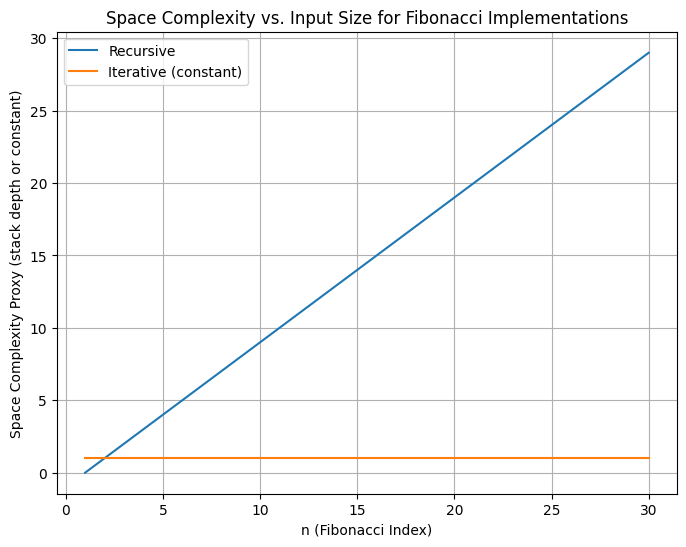

In [ ]:
import matplotlib.pyplot as plt
import sys

# Increase recursion limit to handle deeper recursion for larger n
sys.setrecursionlimit(10000)

# Global variable to track maximum depth
max_depth = 0

def fib_recursive_depth(n, depth=0):
    global max_depth
    if depth > max_depth:
        max_depth = depth
    if n <= 1:
        return n
    return fib_recursive_depth(n-1, depth+1) + fib_recursive_depth(n-2, depth+1)

# Range of n values
ns = list(range(1, 31))

# Lists to store space complexity proxies
recursive_space = []
iterative_space = []

for n in ns:
    global max_depth
    max_depth = 0
    fib_recursive_depth(n)
    recursive_space.append(max_depth)
    iterative_space.append(1)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(ns, recursive_space, label='Recursive')
plt.plot(ns, iterative_space, label='Iterative (constant)')
plt.xlabel('n (Fibonacci Index)')
plt.ylabel('Space Complexity Proxy (stack depth or constant)')
plt.title('Space Complexity vs. Input Size for Fibonacci Implementations')
plt.legend()
plt.grid(True)
plt.savefig('fib_space_complexity.png', dpi=150, bbox_inches='tight')
plt.show()

# Merge Sort

Merge Sort is a divide-and-conquer sorting algorithm that works by breaking down a list into smaller parts, sorting those parts, and then merging them back together in order.

***Steps of Merge Sort:***

**Divide:** Split the unsorted array into two halves.

**Conquer:** Recursively sort each half (keep dividing until you reach arrays of size 1).

**Merge:** Combine (merge) the two sorted halves into a single sorted array.

In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

# Quick Sort

Quick Sort is another divide-and-conquer sorting algorithm, but it works differently from merge sort. Instead of merging, it organizes the array around a pivot element.

***Steps of Quick Sort***

Choose a pivot (can be first, last, middle, or random element).

Partition the array into two parts:


*   **Left side:** elements smaller than the pivot
*   **Right side:** elements greater than the pivot

Recursively apply the same process to the left and right subarrays.

When subarrays have size 0 or 1, they are already sorted, and the algorithm combines them.

In [ ]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Insertion Sort

Insertion Sort is a simple comparison-based sorting algorithm that builds the final sorted array one element at a time. It’s similar to how we arrange playing cards in order in our hands.

***Steps of Insertion Sort***

1. Start with the second element (first is considered sorted).

2. Compare it with elements in the sorted part (left side).

3. Shift elements to the right until the correct position is found.

4. Insert the current element into that position.

5. Repeat for all elements until the array is sorted.

In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

# Bubble Sort

Bubble Sort is the simplest sorting algorithm. It repeatedly steps through the list, compares adjacent elements, and swaps them if they are in the wrong order. This process is repeated until the list becomes sorted.

***Steps of Bubble Sort*** :

1. Start from the first element, compare it with the next.

2. If the current element is greater than the next, swap them.

3. Continue this process for the whole array (this completes one pass).

4. After each pass, the largest element is placed at the end.

5. Repeat for the remaining elements until no swaps are needed.

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Selection Sort

Selection Sort is a comparison-based sorting algorithm. It repeatedly selects the smallest (or largest) element from the unsorted part of the list and puts it in its correct position in the sorted part.

***Steps of Selection Sort :***

1. Start with the first position.

2. Find the smallest element in the unsorted part of the array.

3. Swap it with the element at the current position.

4. Move the boundary between sorted and unsorted one step forward.

5. Repeat until the array is fully sorted.

In [ ]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

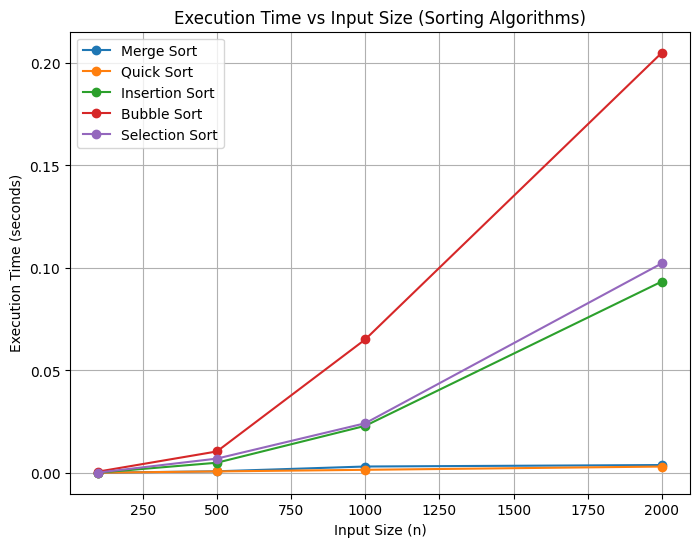

In [ ]:
import random

algorithms = {
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Insertion Sort": insertion_sort,
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort
}

ns = [100, 500, 1000, 2000]
results = {name: [] for name in algorithms}

# Run experiments
for n in ns:
    arr = [random.randint(0, 10000) for _ in range(n)]
    for name, func in algorithms.items():
        test_arr = arr.copy()
        start = time.time()
        func(test_arr)
        end = time.time()
        results[name].append(end - start)

plt.figure(figsize=(8,6))
for name, times in results.items():
    plt.plot(ns, times, marker="o", label=name)

plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Input Size (Sorting Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


***Observations and Analysis:***


* **Merge Sort & Quick Sort – O(n log n):**
Both algorithms scale well as input size increases. Their curves rise moderately, making them suitable for large datasets.
* **Insertion Sort – O(n²):**
The curve grows slowly for small inputs but increases significantly as n becomes larger. Useful only for small or nearly sorted datasets.
* **Bubble Sort & Selection Sort – O(n²):**
Both show steep growth in execution time even for moderate n. They are inefficient and impractical beyond small input sizes.  

**Conclusion:**

For large datasets, Merge Sort and Quick Sort are efficient and scalable. Insertion Sort can still be effective on small or nearly sorted data. Bubble Sort and Selection Sort are mostly educational and not suitable for real-world applications.

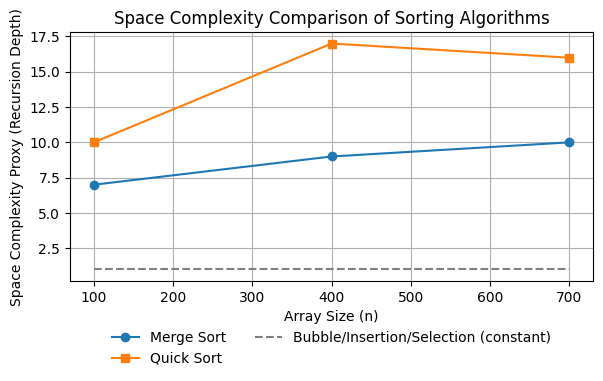

In [5]:
import matplotlib.pyplot as plt
import sys
import random

# Increase recursion limit to handle deeper recursion for larger n
sys.setrecursionlimit(10000)

# Global variable to track maximum recursion depth
max_depth = 0

# Modified merge sort to track recursion depth
def merge_sort_depth(arr, depth=0):
    global max_depth
    if depth > max_depth:
        max_depth = depth
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort_depth(arr[:mid], depth + 1)
    right = merge_sort_depth(arr[mid:], depth + 1)
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

# Modified quick sort to track recursion depth
def quick_sort_depth(arr, depth=0):
    global max_depth
    if depth > max_depth:
        max_depth = depth
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort_depth(left, depth + 1) + middle + quick_sort_depth(right, depth + 1)

# Range of n values (array sizes)
ns = list(range(100, 1000, 300))

# Lists to store space complexity proxies
merge_sort_space = []
quick_sort_space = []
constant_space = []

for n in ns:
    arr = random.sample(range(n * 10), n)  # Create random array of size n

    # Merge Sort space (max recursion depth)
    max_depth = 0
    merge_sort_depth(arr.copy())
    merge_sort_space.append(max_depth)

    # Quick Sort space (max recursion depth)
    max_depth = 0
    quick_sort_depth(arr.copy())
    quick_sort_space.append(max_depth)

    # Constant space for Bubble, Insertion, Selection
    constant_space.append(1)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(ns, merge_sort_space, marker='o', label='Merge Sort')
plt.plot(ns, quick_sort_space, marker='s', label='Quick Sort')
plt.plot(ns, constant_space, '--', color='gray', label='Bubble/Insertion/Selection (constant)')

plt.xlabel('Array Size (n)')
plt.ylabel('Space Complexity Proxy (Recursion Depth)')
plt.title('Space Complexity Comparison of Sorting Algorithms')

# Place legend below the chart
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.grid(True)
plt.tight_layout()
plt.show()


# Binary Serach

Binary Search is an efficient searching algorithm used to find an element in a sorted array.
It works by repeatedly dividing the search interval in half.

***Steps of Binary Search :***

1. Start with the entire sorted array.

2. Find the middle element.

3. If the middle element is the target, stop (found ✅).

4. If the target is smaller, search the left half.

5. If the target is larger, search the right half.

6. Repeat until the element is found or the subarray becomes empty

In [ ]:
def binary_search(arr, target):
    left, right = 0, len(arr)-1
    while left <= right:
        mid = (left + right)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

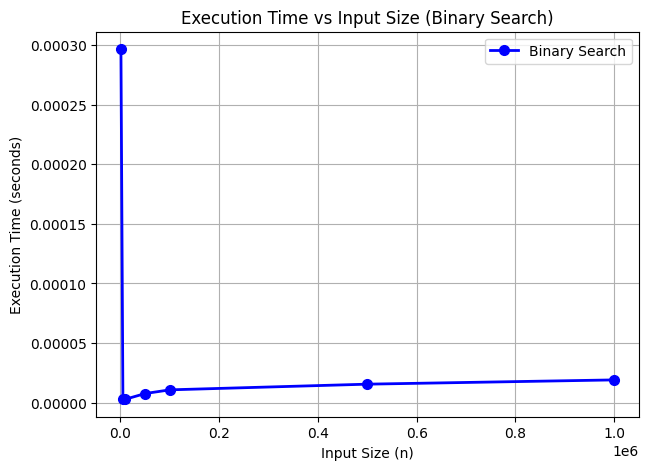

In [ ]:
import random

ns = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
times = []

for n in ns:
    arr = list(range(n))  # sorted array
    target = n - 1        # worst case: last element

    start = time.time()
    binary_search(arr, target)
    end = time.time()

    times.append(end - start)

# Plot graph
plt.figure(figsize=(7,5))
plt.plot(ns, times, marker="o", color="blue", linewidth=2, markersize=7, label="Binary Search")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Input Size (Binary Search)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
!pip install memory_profiler

In [ ]:
import random
import time
from memory_profiler import memory_usage

def profile_algorithm(func, *args):
    """Profiles execution time and memory usage of an algorithm."""
    start_time = time.time()
    mem_usage = memory_usage((func, args), max_iterations=1, retval=True)
    end_time = time.time()

    exec_time = end_time - start_time
    mem_used = max(mem_usage[0]) - min(mem_usage[0])

    return exec_time, mem_used

algorithms = {
    "Merge Sort": lambda arr: merge_sort(arr.copy()),
    "Quick Sort": lambda arr: quick_sort(arr.copy()),
    "Bubble Sort": lambda arr: bubble_sort(arr.copy()),
    "Insertion Sort": lambda arr: insertion_sort(arr.copy()),
    "Selection Sort": lambda arr: selection_sort(arr.copy()),
    "Fibonacci Recursive": lambda n: fib_recursive(n),
    "Fibonacci DP": lambda n: fib(n),
    "Binary Search": lambda arr: binary_search(arr, arr[-1])
}

# Test input sizes
n = 500  # for sorting + binary search
fib_n = 20  # smaller for recursion

arr = [random.randint(0, 10000) for _ in range(n)]
sorted_arr = sorted(arr)

for name, func in algorithms.items():
    if "Fibonacci Recursive" in name:
        args = (fib_n,)
    elif "Fibonacci DP" in name:
        args = (fib_n,)
    elif "Binary Search" in name:
        args = (sorted_arr,)
    else:
        args = (arr,)

    exec_time, mem_used = profile_algorithm(func, *args)

    print(f"{name}")
    print(f"Execution Time: {exec_time:.6f} seconds")
    print(f"Memory Usage: {mem_used:.4f} MiB\n")


Merge Sort
Execution Time: 0.018063 seconds
Memory Usage: 0.0859 MiB

Quick Sort
Execution Time: 0.016394 seconds
Memory Usage: 0.0039 MiB

Bubble Sort
Execution Time: 0.025447 seconds
Memory Usage: 0.0000 MiB

Insertion Sort
Execution Time: 0.020420 seconds
Memory Usage: 0.0000 MiB

Selection Sort
Execution Time: 0.022360 seconds
Memory Usage: 0.0000 MiB

Fibonacci Recursive
Execution Time: 0.016987 seconds
Memory Usage: 0.0000 MiB

Fibonacci DP
Execution Time: 0.015622 seconds
Memory Usage: 0.1094 MiB

Binary Search
Execution Time: 0.015367 seconds
Memory Usage: 0.0000 MiB



# Summary

| **Algorithm**           | **Time Complexity**                                          | **Space Complexity**                | **Suitability / Notes**                    |
| ----------------------- | ------------------------------------------------------------ | ----------------------------------- | ------------------------------------------ |
| **Recursive Fibonacci** | O(2ⁿ)                                                        | O(n) (recursion stack)              | Inefficient, only educational.             |
| **Fibonacci (DP)**      | O(n)                                                         | O(n) (array) / O(1) (optimized)     | Efficient, practical for larger inputs.    |
| **Merge Sort**          | Best: O(n log n) <br> Avg: O(n log n) <br> Worst: O(n log n) | O(n)                                | Stable, good for large datasets.           |
| **Quick Sort**          | Best: O(n log n) <br> Avg: O(n log n) <br> Worst: O(n²)      | O(log n) (recursion)                | Very fast on average; worst-case risk.     |
| **Insertion Sort**      | Best: O(n) <br> Avg/Worst: O(n²)                             | O(1)                                | Useful for small or nearly sorted arrays.  |
| **Bubble Sort**         | Best: O(n) <br> Avg/Worst: O(n²)                             | O(1)                                | Simple but not practical for large inputs. |
| **Selection Sort**      | Best/Avg/Worst: O(n²)                                        | O(1)                                | Easy to implement, not efficient.          |
| **Binary Search**       | O(log n)                                                     | O(1) iterative / O(log n) recursive | Extremely efficient for sorted data.       |
